The value of c is :6



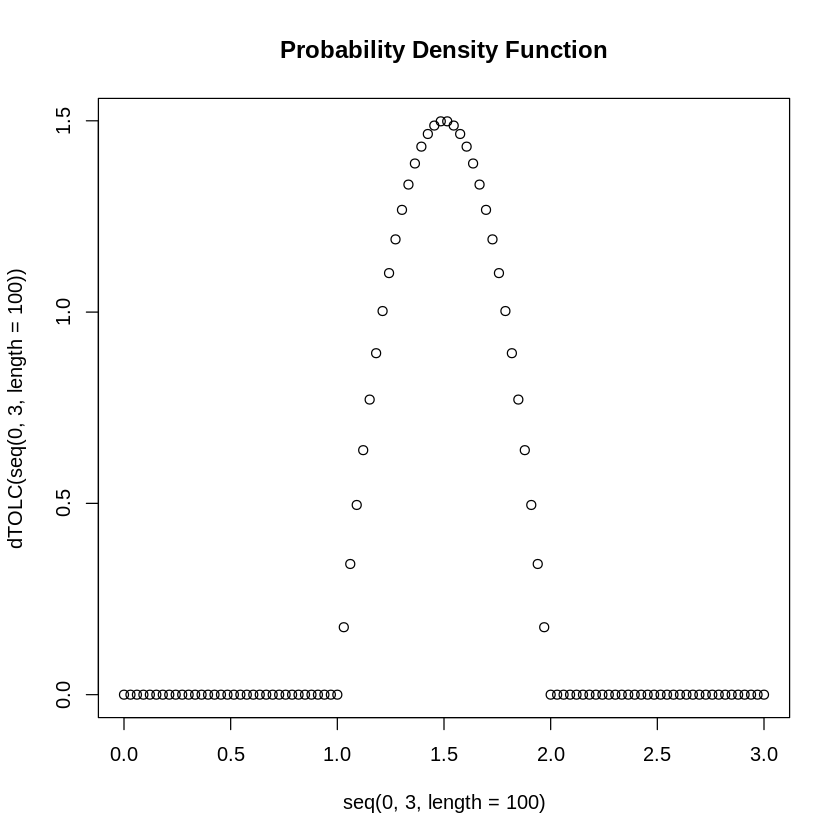

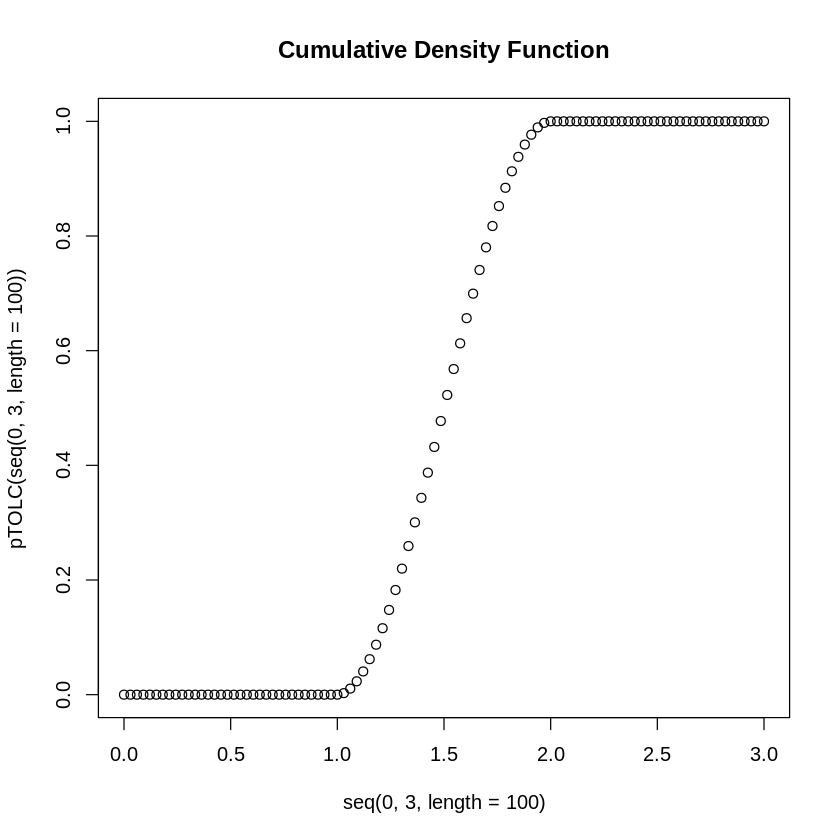

Probability of a test lasting more than 75 min : 0.843749999999999

Probability of a test lasting between 90 and 120 min : 0.500000000000001



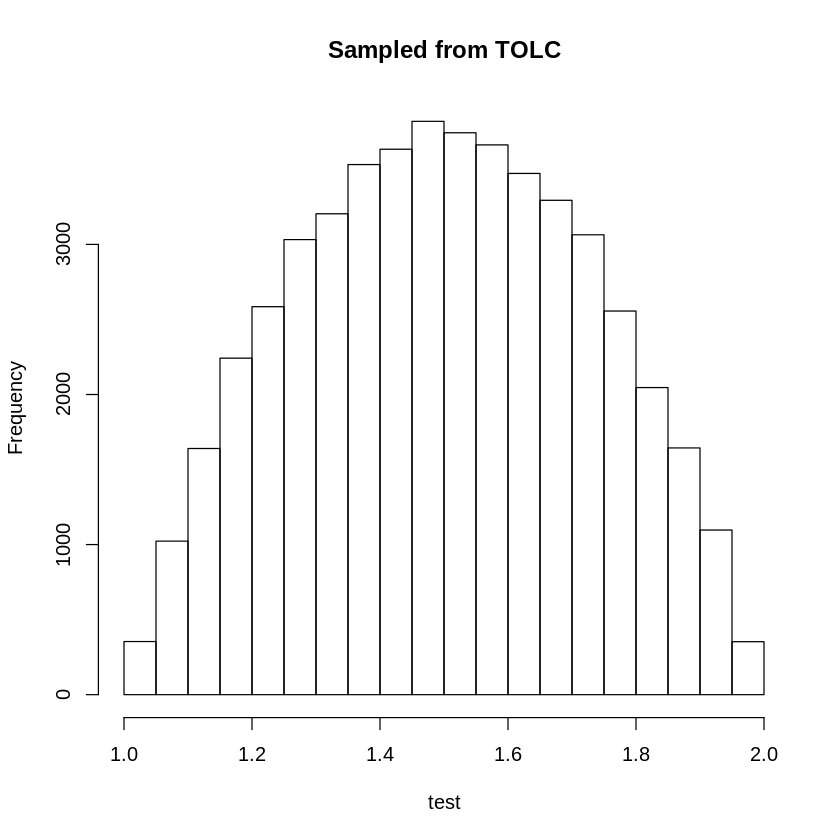

In [36]:
#Ex 1
library(dplyr)


integral <- integrate(function(x){(x-1)*(2-x)},lower=1,upper=2)
c<-1/integral$value
message("The value of c is :",c)

cumulative <- function(y){c*(-1/3*y^3+3/2*y^2-2*y) - c*(-5/6)}

dTOLC <- function(x){
    p <- ifelse(x>=1 & x<=2,c*(x-1)*(2-x),0)
    return(p)
    }

pTOLC <- function(x){
    p <- case_when(x>1 & x<2 ~ cumulative(x),x<=1 ~ 0,x>=2 ~ 1)
    return(p)
    }

rTOLC <- function(y){
    uni <- runif(y)
    trials <- seq(1,2,length=10000)
    index <- cumulative(trials)
    p<-trials[findInterval(uni,index)]
    return(p)
    }

qTOLC <- function(y){
    trials <- seq(1,2,length=10000)
    index <- cumulative(trials)
    p<-1+findInterval(y,index)/10000
    return(p)
    }

plot(seq(0,3,length=100),dTOLC(seq(0,3,length=100)),main="Probability Density Function")
plot(seq(0,3,length=100),pTOLC(seq(0,3,length=100)),main="Cumulative Density Function")

test=rTOLC(50000)
hist(test,main="Sampled from TOLC")

message("Probability of a test lasting more than 75 min : ", 1-cumulative(75/60))
message("Probability of a test lasting between 90 and 120 min : ", cumulative(120/60) - cumulative(90/60))


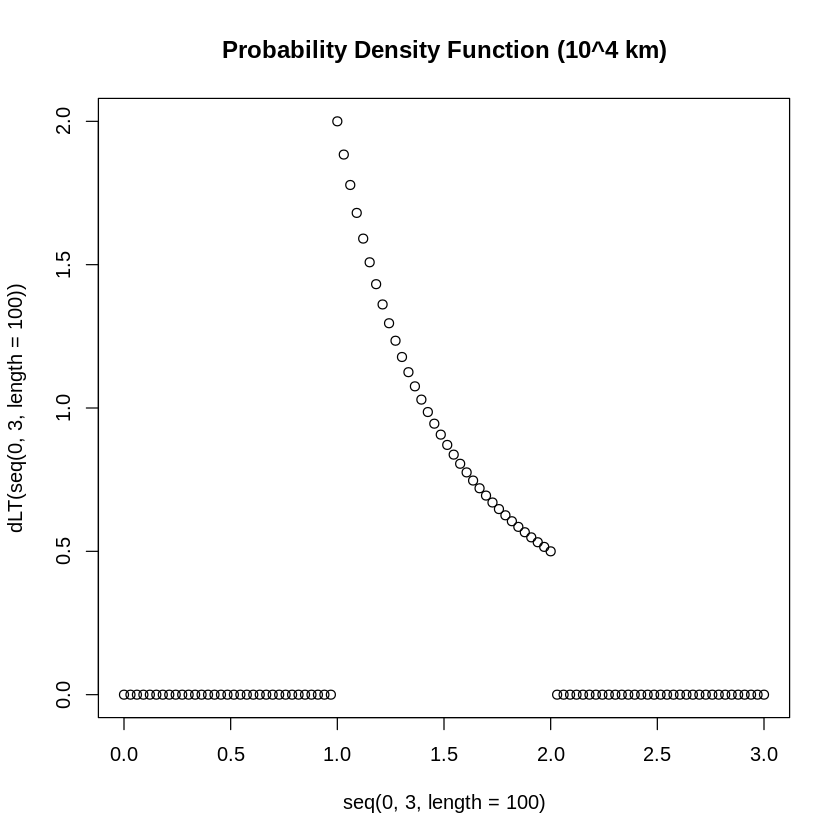

Probability of a tire lasting less than 15000km: 0.666666666666667



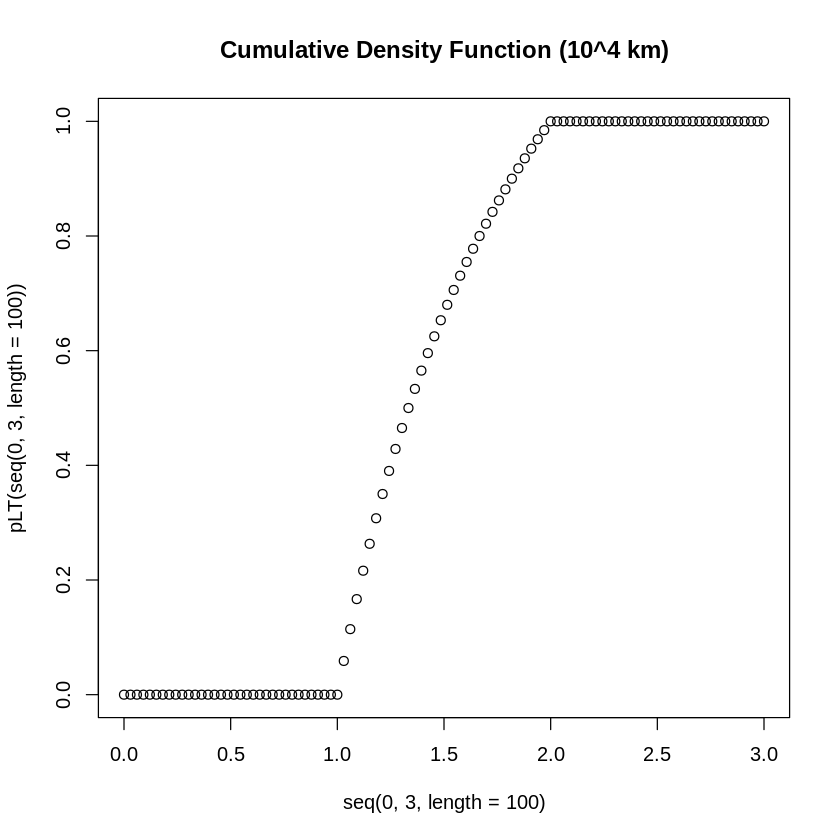

The main value of a sample of 3000 tires is of : 1385.61699503284 km

The variance of a sample of 3000 tires is of : 78686.4420797642 km^2

The standard deviation of a sample of 3000 tires is of : 280.511037358183 km



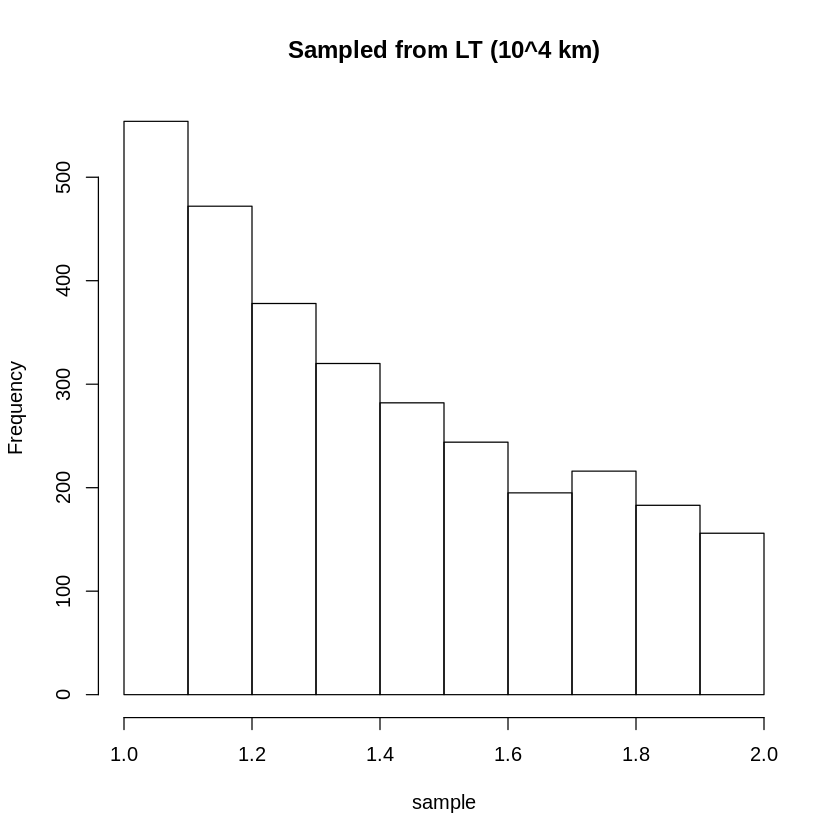

In [42]:
#Ex 2

cumulative_2 <- function(y){(-2/y) + 2}

dLT <- function(x){
    p <- ifelse(x>=1 & x<=2,2/(x^2),0)
    return(p)
    }

pLT <- function(x){
    p <- case_when(x>1 & x<2 ~ cumulative_2(x),x<=1 ~ 0,x>=2 ~ 1)
    return(p)
    }

rLT <- function(y){
    uni <- runif(y)
    trials <- seq(1,2,length=10000)
    index <- cumulative_2(trials)
    p<-trials[findInterval(uni,index)]
    return(p)
    }

qLT <- function(y){
    trials <- seq(1,2,length=10000)
    index <- cumulative_2(trials)
    p<-1+findInterval(y,index)/10000
    return(p)
    }

plot(seq(0,3,length=100),dLT(seq(0,3,length=100)),main="Probability Density Function (10^4 km)")
plot(seq(0,3,length=100),pLT(seq(0,3,length=100)),main="Cumulative Density Function (10^4 km)")

message("Probability of a tire lasting less than 15000km: ", cumulative(1.5))

sample=rLT(3000)
hist(sample,main="Sampled from LT (10^4 km)")

message("The main value of a sample of 3000 tires is of : ", mean(sample)*1000," km")
message("The variance of a sample of 3000 tires is of : ", (mean(sample*sample) - mean(sample)^2)*1000*1000," km^2")
message("The standard deviation of a sample of 3000 tires is of : ", sqrt((mean(sample*sample) - mean(sample)^2))*1000," km")

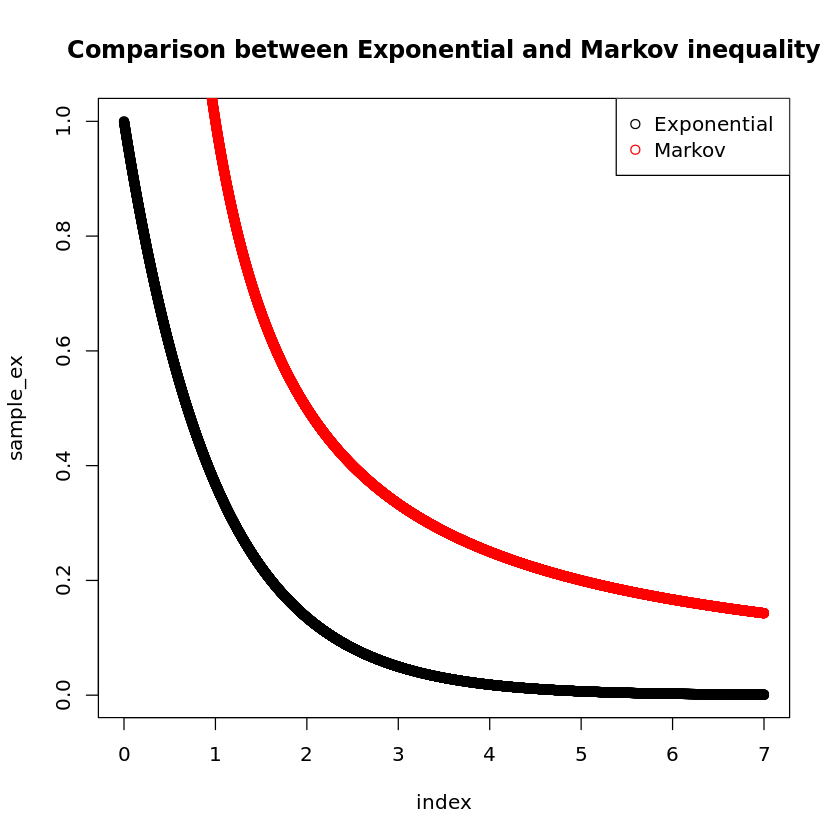

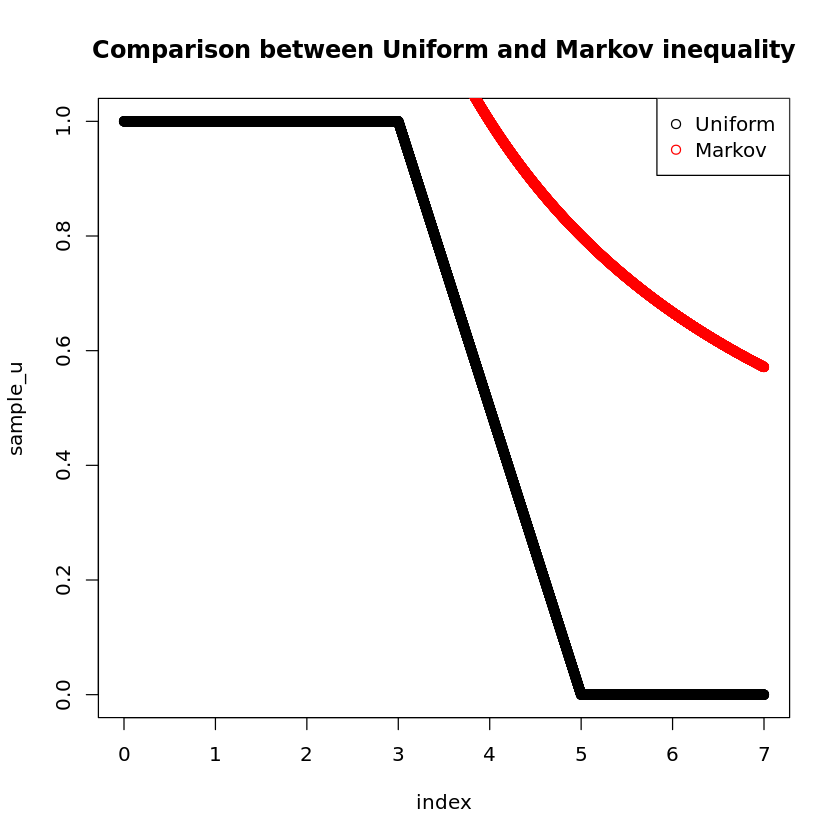

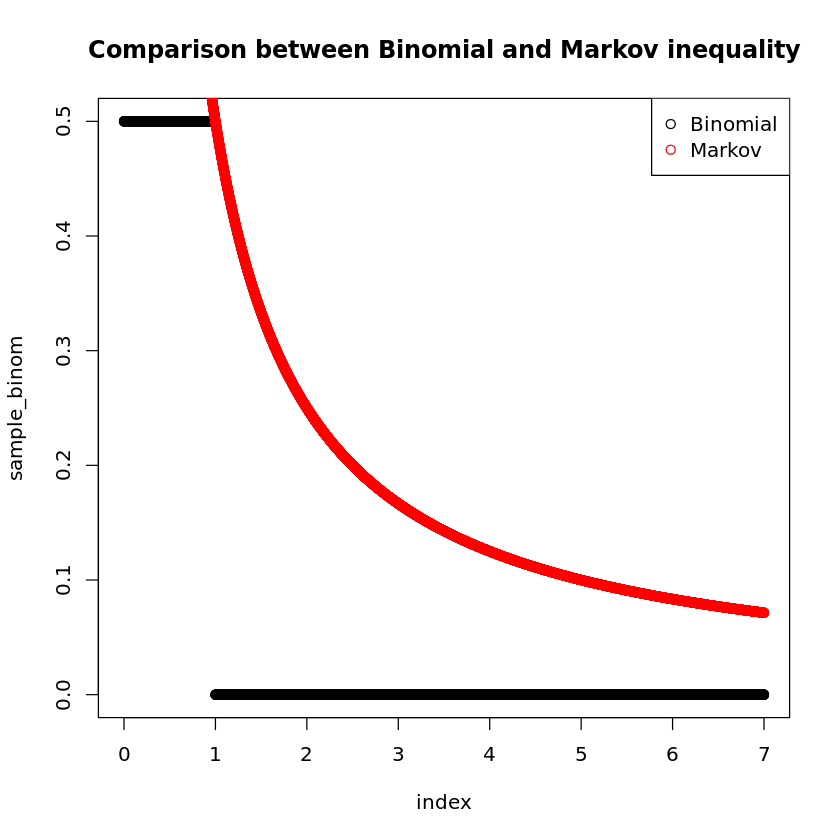

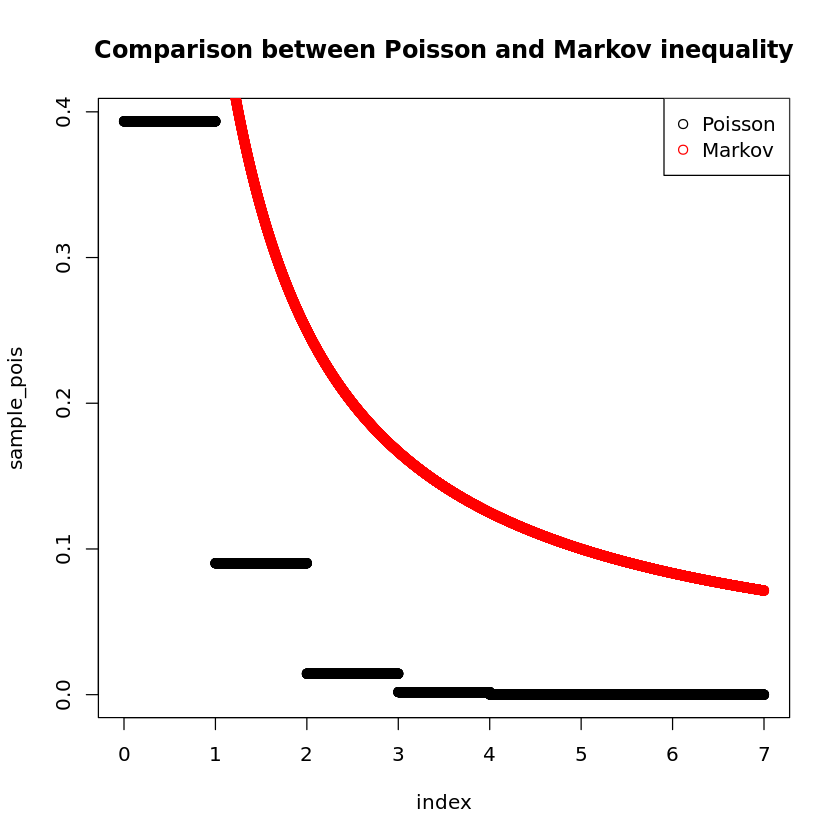

In [1]:
#Ex 3

index <- seq(0,7,length=10000)
sample_ex <- 1-pexp(index,1)
sample_u <-1-punif(index,3,5)
sample_binom <- 1-pbinom(index,1,1/2)
sample_pois <- 1- ppois(index,1/2)

plot(index,sample_ex,main="Comparison between Exponential and Markov inequality")
points(index,1/index,col="red")
legend(x="topright", y="topright",legend=c("Exponential","Markov"),cex=1,col=c("black","red"),pch=1)

plot(index,sample_u,main="Comparison between Uniform and Markov inequality")
points(index,4/index,col="red")
legend(x="topright", y="topright",legend=c("Uniform","Markov"),cex=1,col=c("black","red"),pch=1)

plot(index,sample_binom,main="Comparison between Binomial and Markov inequality")
points(index,1/(2*index),col="red")
legend(x="topright", y="topright",legend=c("Binomial","Markov"),cex=1,col=c("black","red"),pch=1)

plot(index,sample_pois,main="Comparison between Poisson and Markov inequality")
points(index,1/(2*index),col="red")
legend(x="topright", y="topright",legend=c("Poisson","Markov"),cex=1,col=c("black","red"),pch=1)

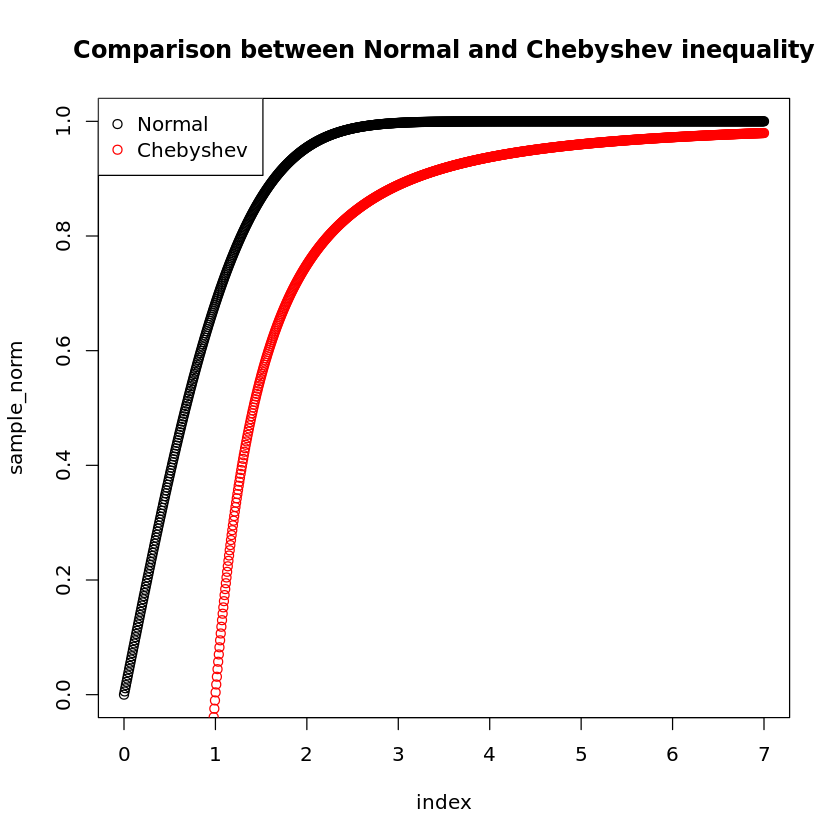

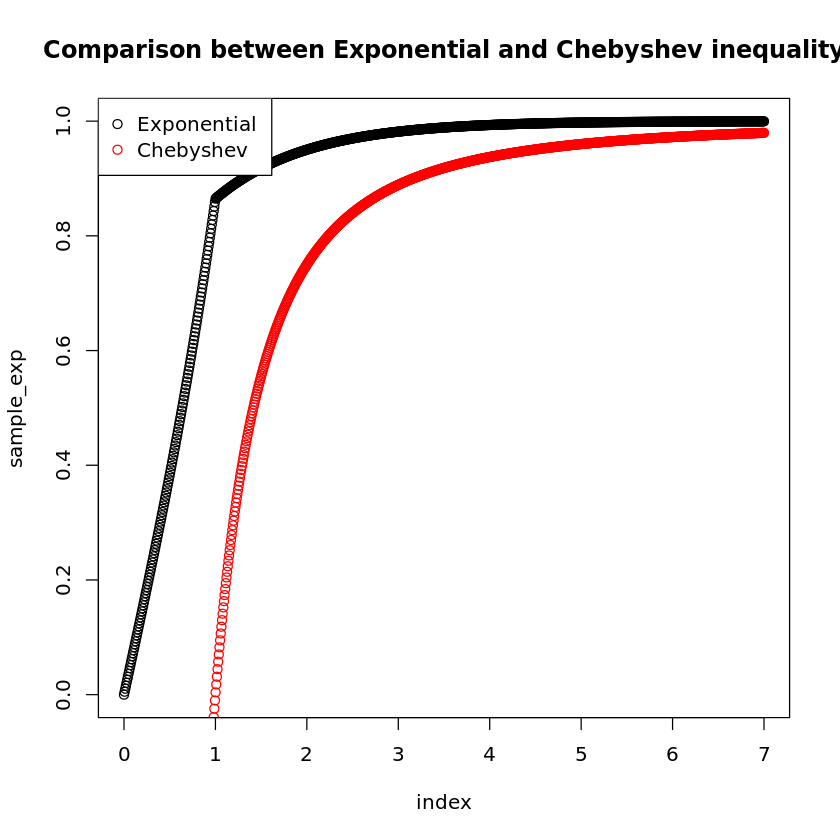

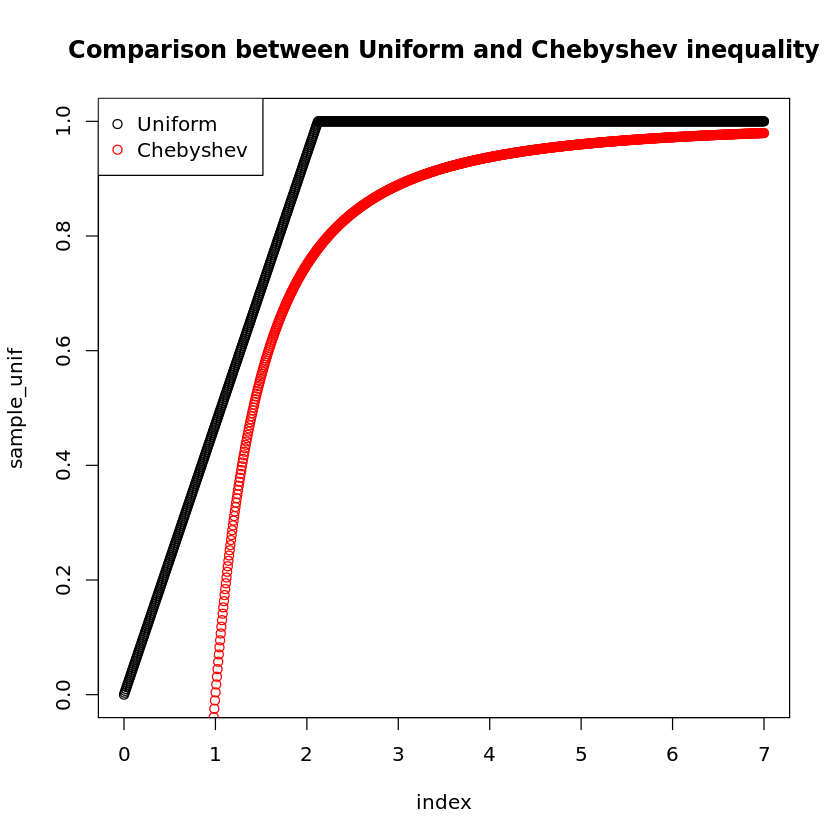

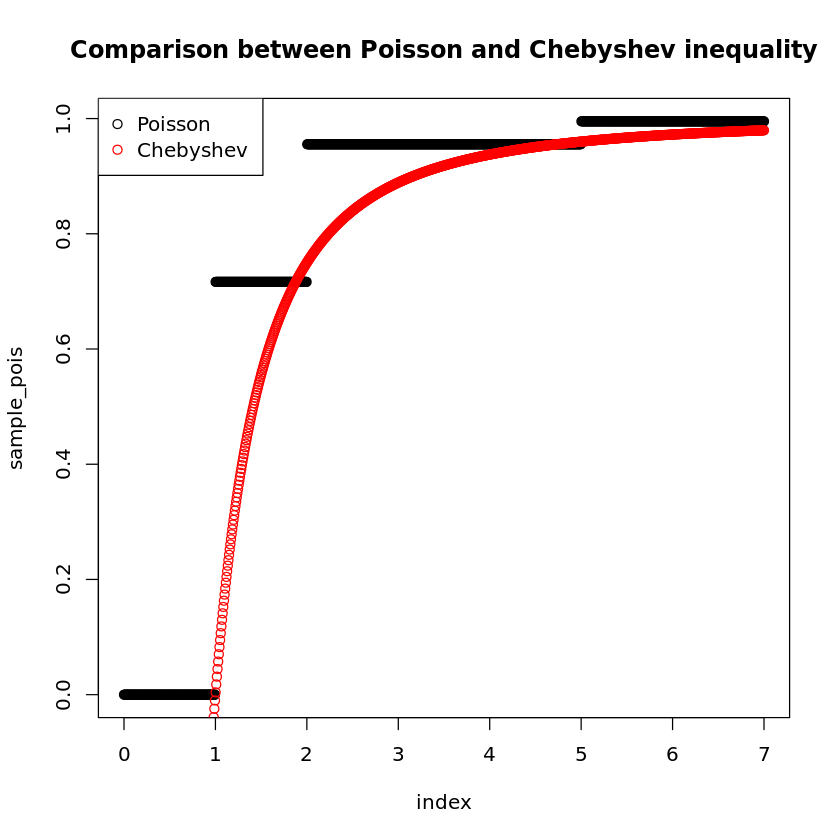

In [2]:
#Ex 4

index <- seq(0,7,length=1000)
sample_norm <- pnorm(3+index*5,3,5)- pnorm(3-index*5,3,5)
sample_exp <-pexp(1+index,1) - pexp(1-index,1)
sample_unif <- punif(1+index*2/3,1-sqrt(2),1+sqrt(2)) - punif(1-index*2/3,1-sqrt(2),1+sqrt(2))
sample_pois <- ppois(1/3 + index*1/3,1/3) - ppois(1/3 - index*1/3,1/3)

plot(index,sample_norm,main="Comparison between Normal and Chebyshev inequality")
points(index,1-1/(index^2),col="red")
legend(x="topleft", y="topleft",legend=c("Normal","Chebyshev"),cex=1,col=c("black","red"),pch=1)

plot(index,sample_exp,main="Comparison between Exponential and Chebyshev inequality")
points(index,1-1/(index^2),col="red")
legend(x="topleft", y="topleft",legend=c("Exponential","Chebyshev"),cex=1,col=c("black","red"),pch=1)

plot(index,sample_unif,main="Comparison between Uniform and Chebyshev inequality")
points(index,1-1/(index^2),col="red")
legend(x="topleft", y="topleft",legend=c("Uniform","Chebyshev"),cex=1,col=c("black","red"),pch=1)

plot(index,sample_pois,main="Comparison between Poisson and Chebyshev inequality")
points(index,1-1/(index^2),col="red")
legend(x="topleft", y="topleft",legend=c("Poisson","Chebyshev"),cex=1,col=c("black","red"),pch=1)